# Lecture 11

In [2]:
library(ggplot2)
library(zoo)
library(dplyr)



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Loading a simple economics dataset and filtering by date and unemployment statistics

In [3]:
df <- economics %>% 
  select(date, unemploy) %>% 
  rename(y = unemploy) %>% 
  mutate(
    t = as.numeric(date)
  )


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"Removed 11 rows containing missing values or values outside the scale range
(`geom_line()`)."


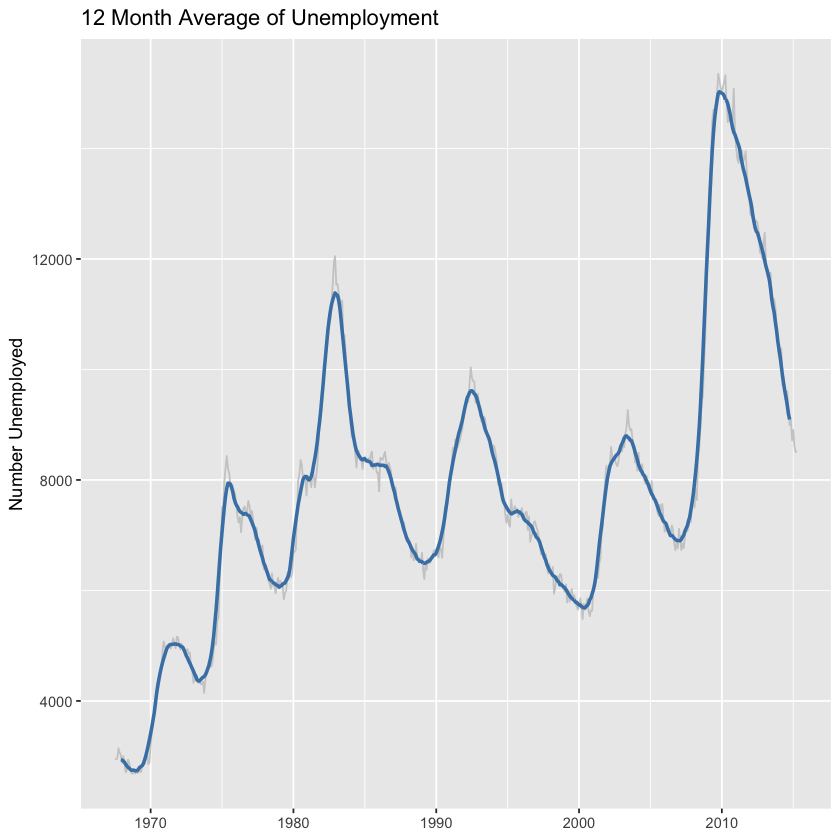

In [4]:
df_ma <- df %>%
  mutate(MA12 = rollmean(y, k = 12, fill = NA, align = "center"))

ggplot(df_ma, aes(date)) +
  geom_line(aes(y = y),    color = "gray80") +
  geom_line(aes(y = MA12), color = "steelblue", size = 1) +
  labs(title = "12 Month Average of Unemployment", x = NULL, y = "Number Unemployed")

`geom_smooth()` using formula = 'y ~ x'


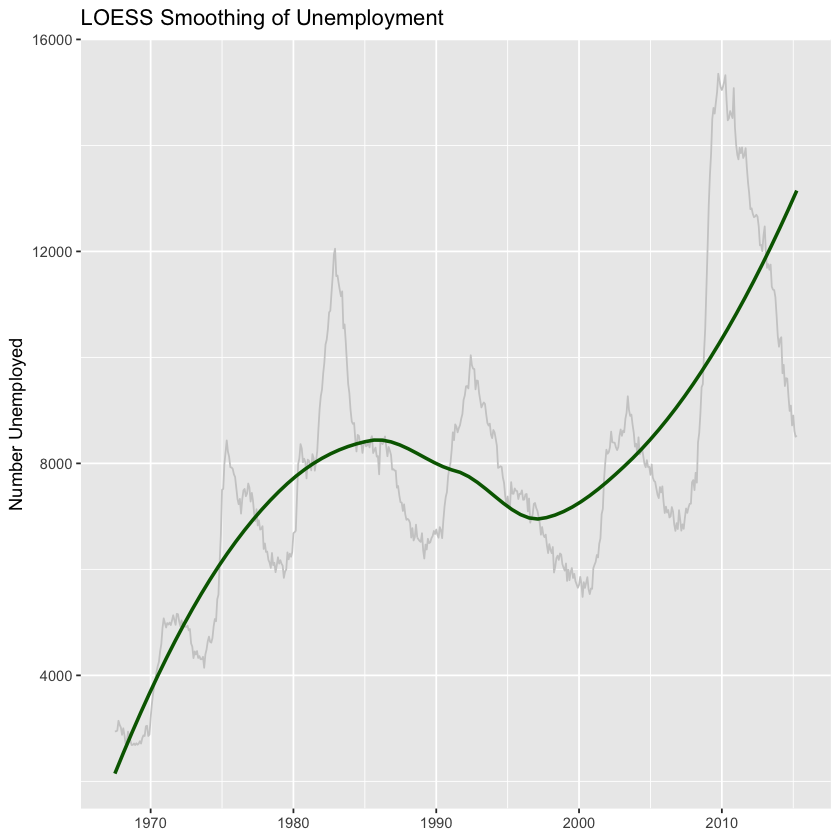

In [5]:
ggplot(df, aes(date, y)) +
  geom_line(color = "gray80") +
  geom_smooth(method = "loess", se = FALSE, color = "darkgreen", size = 1) +
  labs(
    title = "LOESS Smoothing of Unemployment",
    x = NULL, y = "Number Unemployed"
  )


# Lecture 12

In [6]:
library(sf)
library(rnaturalearth)  
library(rnaturalearthdata)
library(cartogram)        

world <- ne_countries(scale = "medium", returnclass = "sf")


Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE


Attaching package: 'rnaturalearthdata'


The following object is masked from 'package:rnaturalearth':

    countries110




A baseline map using default geographic projection

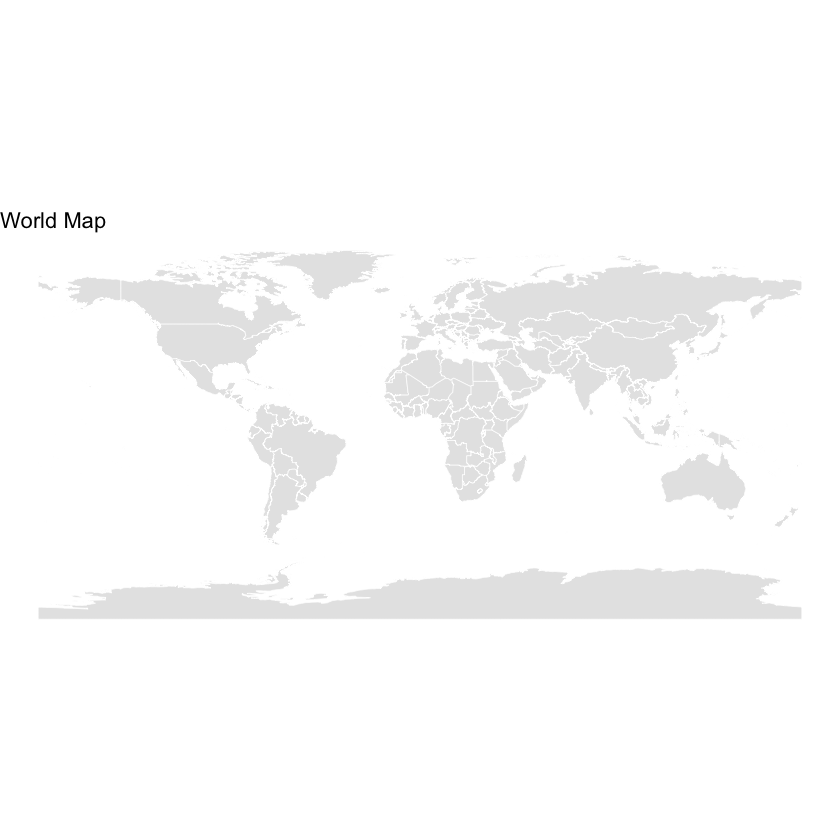

In [7]:
ggplot(world) +
geom_sf(fill="gray90",color="white") +
labs(title="World Map") +
theme_void()


### Color each country by population

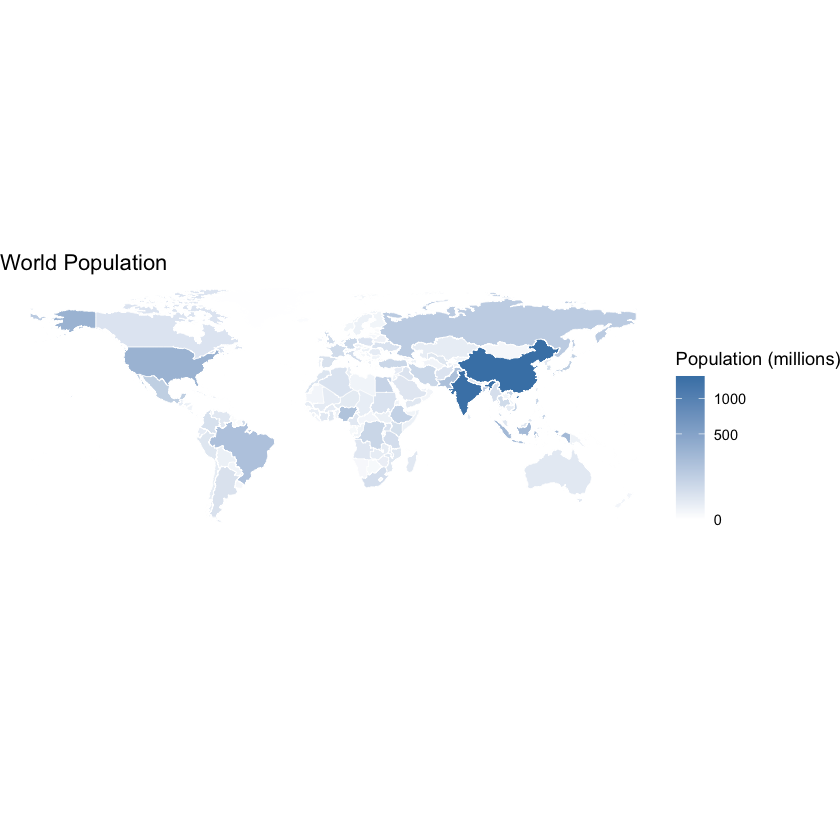

In [8]:
ggplot(world,aes(fill=pop_est/1e6)) +
  geom_sf(color="white",size=0.1) +
  scale_fill_gradient(name="Population (millions)",low="white",high="steelblue",trans="sqrt") +
  labs(title="World Population")+theme_void()


Scaling size by other factors

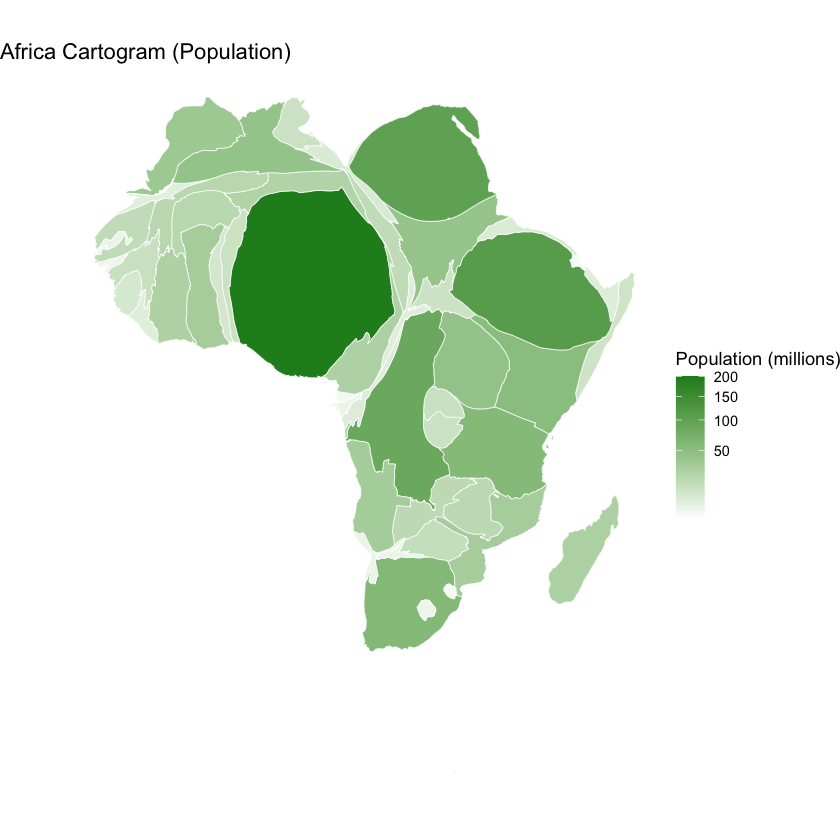

In [16]:
africa<-subset(world,continent=="Africa")
afr_proj<-st_transform(africa,crs="+proj=laea")
afr_cart<-cartogram_cont(afr_proj,"pop_est",15)
ggplot(afr_cart,aes(fill=pop_est/1e6))+
  geom_sf(color="white",size=0.1)+
  scale_fill_gradient(name="Population (millions)",low="white",high="forestgreen",trans="sqrt")+
  labs(title="Africa Cartogram (Population)")+
  theme_void()


# Lecture 13

Loading the chocolate dataset from the lecture

In [10]:
cacao<-read.csv("http://www.ics.uci.edu/~algol/teaching/informatics143w2021/cacao_means.csv")


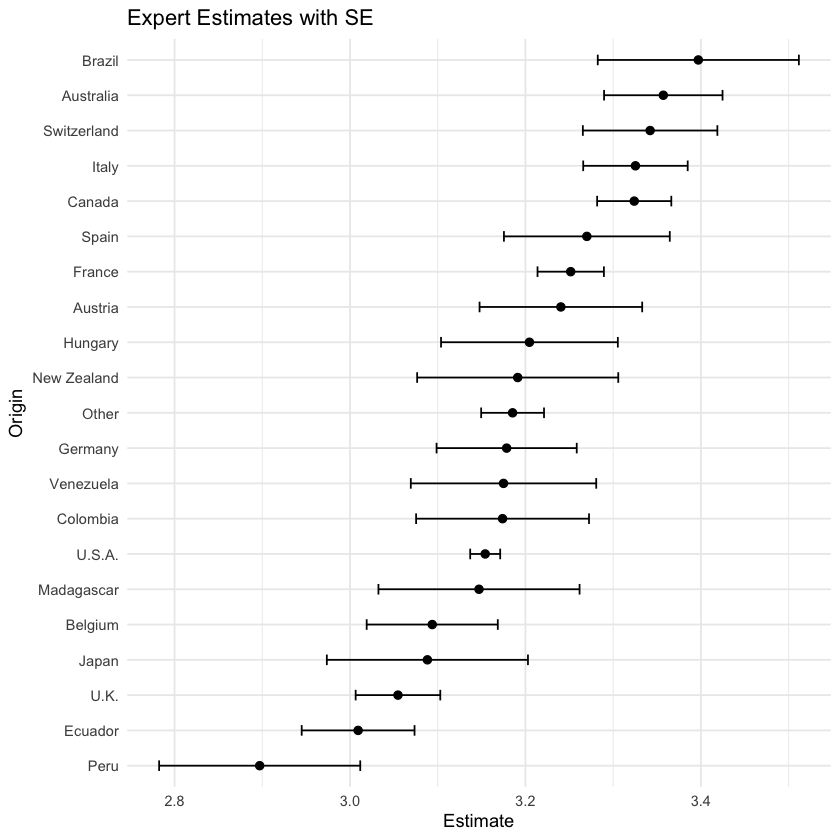

In [11]:
ggplot(cacao,aes(x=estimate,y=reorder(location,estimate))) +
 geom_point(size=2)+
 geom_errorbarh(aes(xmin=estimate-std.error,xmax=estimate+std.error),height=0.3) +
 labs(title="Expert Estimates with SE",x="Estimate",y="Origin") +
 theme_minimal()


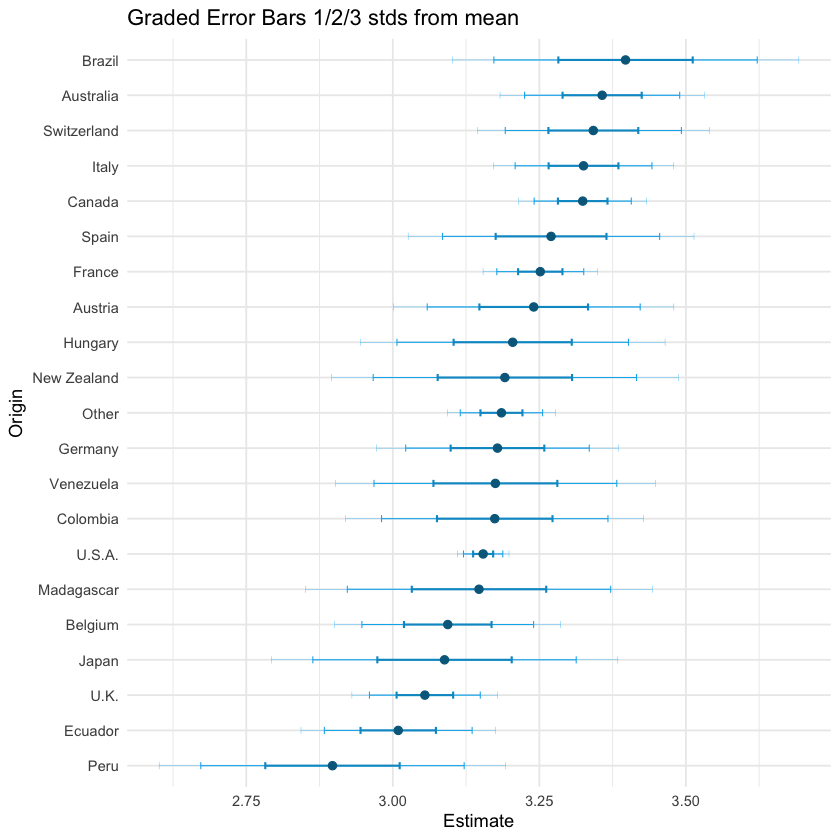

In [12]:
ggplot(cacao,aes(x=estimate,y=reorder(location,estimate))) +
 geom_errorbarh(aes(xmin=estimate-2.58*std.error,xmax=estimate+2.58*std.error),size=0.1,height=0.2,color="deepskyblue") +
 geom_errorbarh(aes(xmin=estimate-1.96*std.error,xmax=estimate+1.96*std.error),size=0.3,height=0.2,color="deepskyblue2") +
 geom_errorbarh(aes(xmin=estimate-std.error,xmax=estimate+std.error),size=0.6,height=0.2,color="deepskyblue3") +
 geom_point(color="deepskyblue4",size=2) +
 labs(title="Graded Error Bars 1/2/3 stds from mean",x="Estimate",y="Origin") +
 theme_minimal()


### Lecture 14

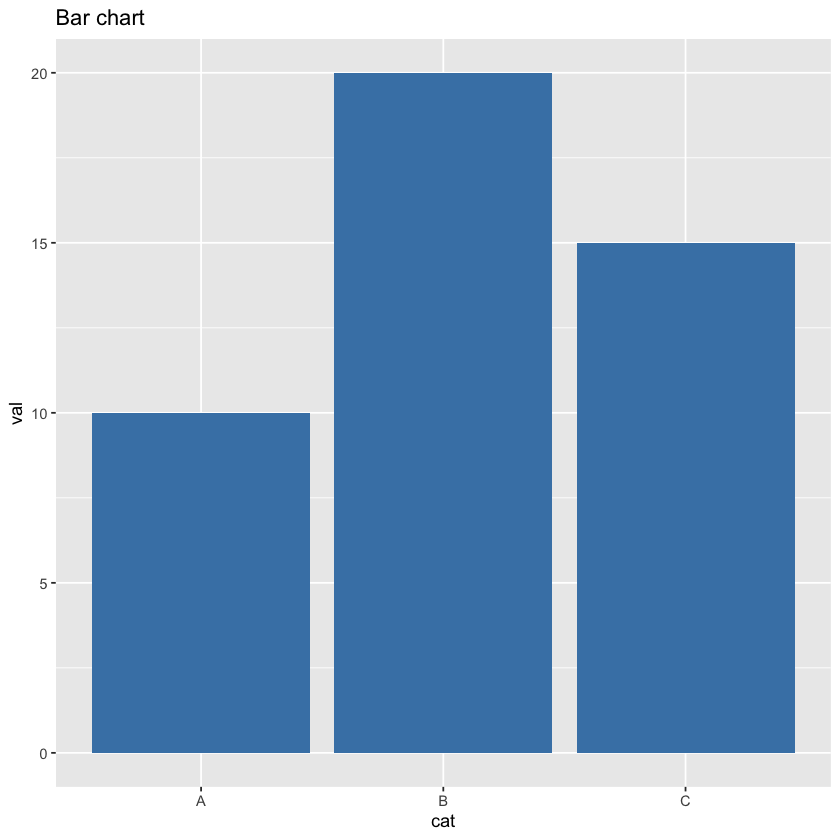

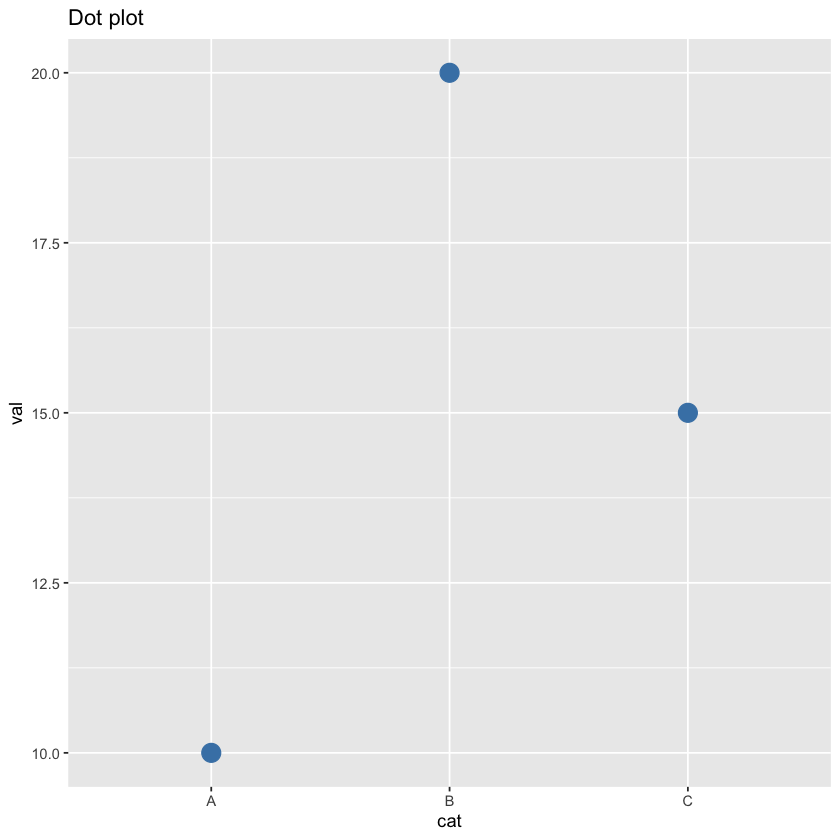

In [13]:
dfp<-data.frame(cat=c("A","B","C"),val=c(10,20,15))
ggplot(dfp,aes(cat,val))+geom_bar(stat="identity",fill="steelblue")+labs(title="Bar chart")
ggplot(dfp,aes(cat,val))+geom_point(size=5,color="steelblue")+labs(title="Dot plot")


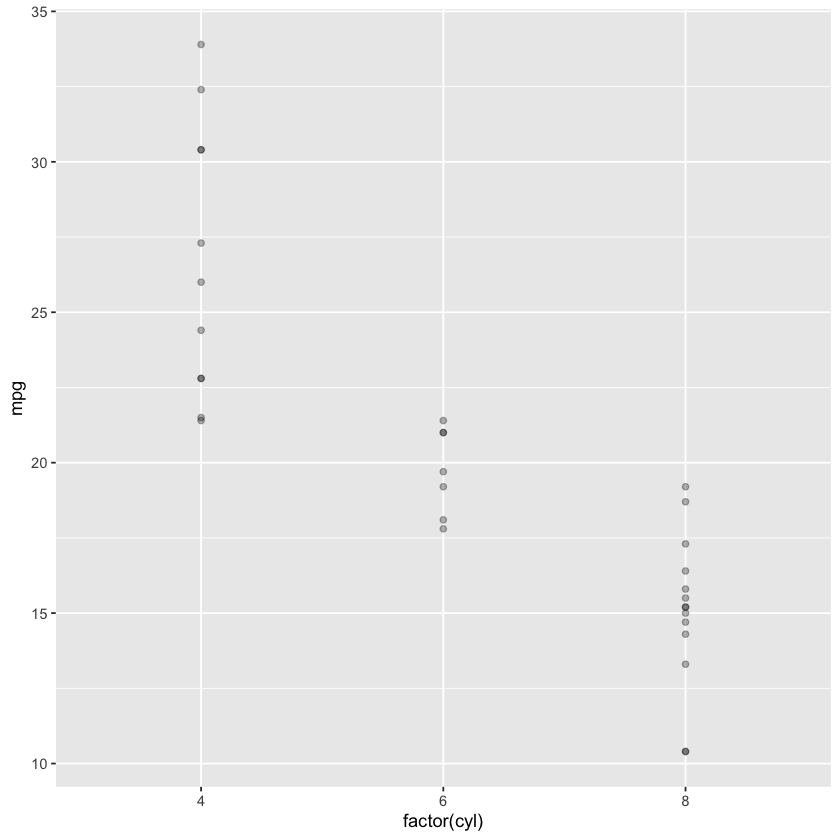

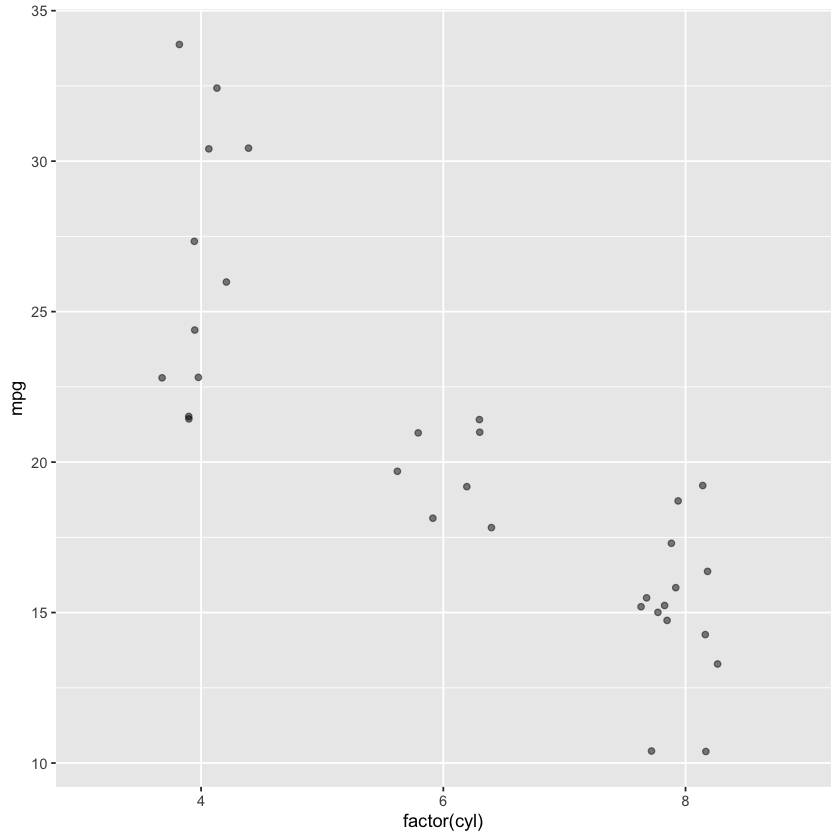

In [14]:
ggplot(mtcars,aes(factor(cyl),mpg))+geom_point(alpha=0.3)
ggplot(mtcars,aes(factor(cyl),mpg))+geom_jitter(width=0.2,alpha=0.5)


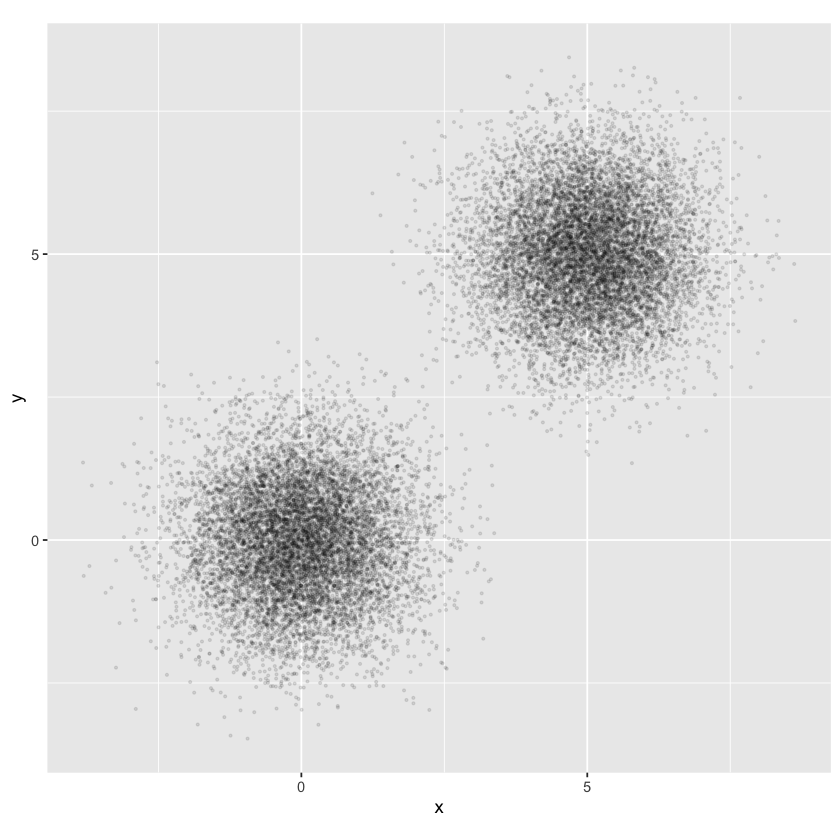

Warning message:
"The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(level)` instead."


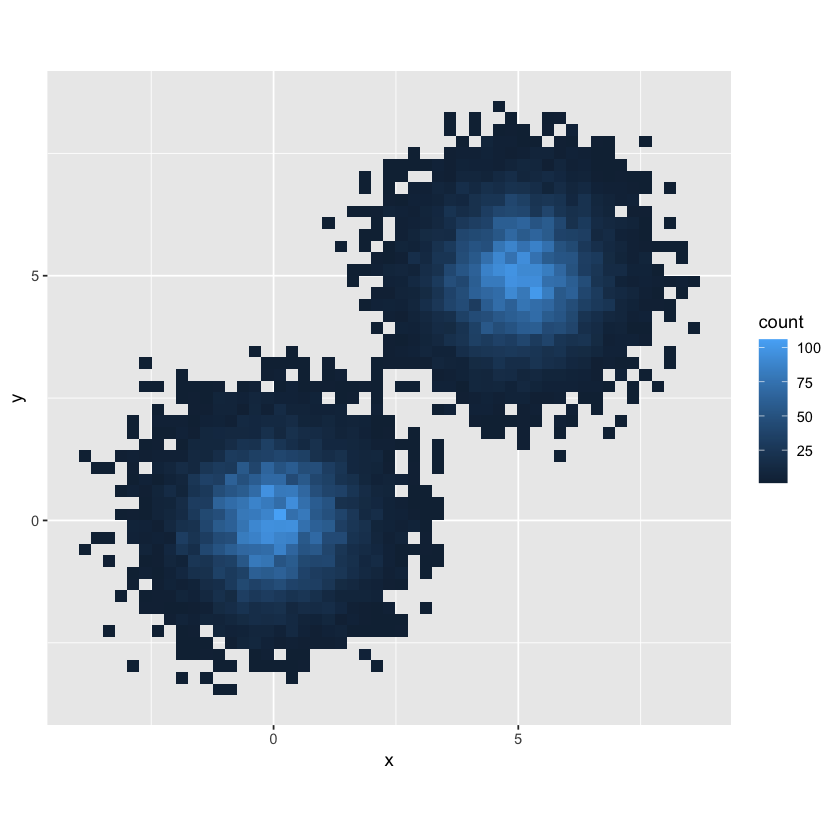

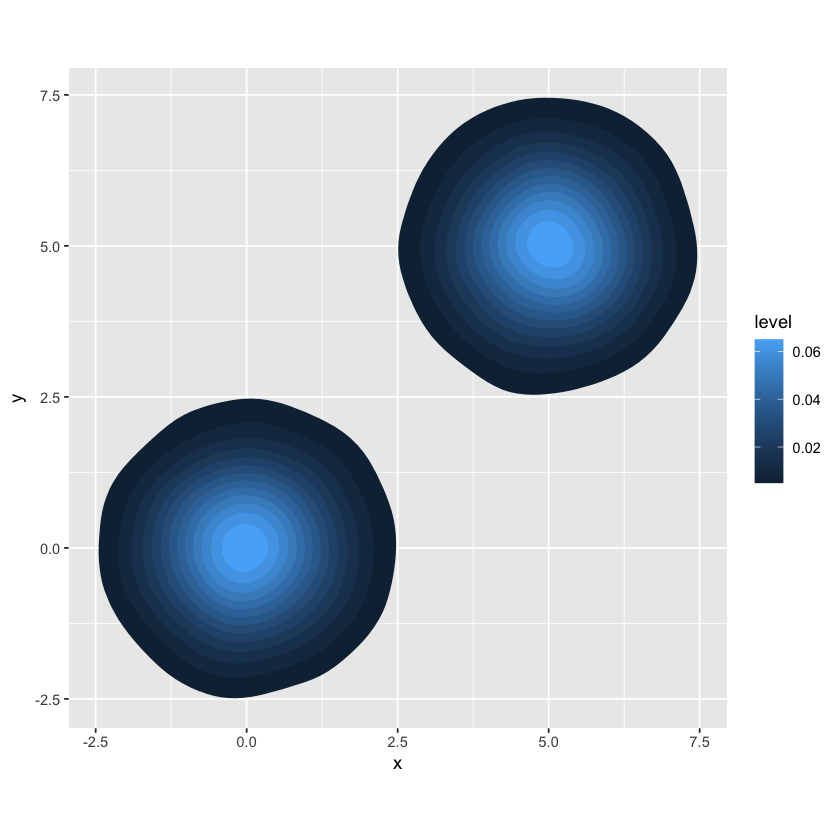

In [15]:
dat<-data.frame(x=c(rnorm(10000,0,1),rnorm(10000,5,1)),
                y=c(rnorm(10000,0,1),rnorm(10000,5,1)))
ggplot(dat,aes(x,y))+geom_point(alpha=0.1,size=0.5)+coord_equal()
ggplot(dat,aes(x,y))+geom_bin2d(bins=50)+coord_equal()
ggplot(dat,aes(x,y))+stat_density_2d(aes(fill=..level..),geom="polygon")+coord_equal()
